<a href="https://colab.research.google.com/github/veronichaflasma/Dicoding-Machine-Learning/blob/main/First_Project_Creating_an_NLP_Model_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **First Project: Creating an NLP Model with TensorFlow**

**Flasma Veronicha Hendryanna**

Classify Movie Genre




# **Import the Library**

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
import zipfile
import warnings
import nltk, os, re, string

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

warnings.filterwarnings("ignore")

# **Import Dataset from Kaggle**

In [2]:
# Install Kaggle package
!pip install -q Kaggle

# Upload Kaggle API
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"veronichaflasmah","key":"dde43e6a5f54fd094e4226c94eb31937"}'}

In [3]:
# Create directory and change the permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
# Download and copy the dataset's API
!kaggle datasets download -d lokkagle/movie-genre-data

 95% 9.00M/9.46M [00:00<00:00, 79.4MB/s]
100% 9.46M/9.46M [00:00<00:00, 82.2MB/s]


In [5]:
# Unzip the dataset
!mkdir movies
!unzip movie-genre-data.zip -d movies
!ls movies

Archive:  movie-genre-data.zip
  inflating: movies/kaggle_movie_train.csv  
kaggle_movie_train.csv


# **Data Vizualitation**

In [9]:
movies_data = pd.read_csv('movies/kaggle_movie_train.csv')
movies_data.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [10]:
# Delete unused column (id)
movies_data = movies_data.drop(columns=['id'])
movies_data

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,"t, summa cum laude and all. And I'm about to l...",comedy
2,"up Come, I have a surprise.... She takes him ...",drama
3,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,"nd dismounts, just as the other children reach...",drama
...,...,...
22574,n in the world to decide what I'm going to do ...,drama
22575,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,....with marked skill and dexterity . LANA wry...,action


In [11]:
# Count total movie in every genre
movies_data.genre.value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

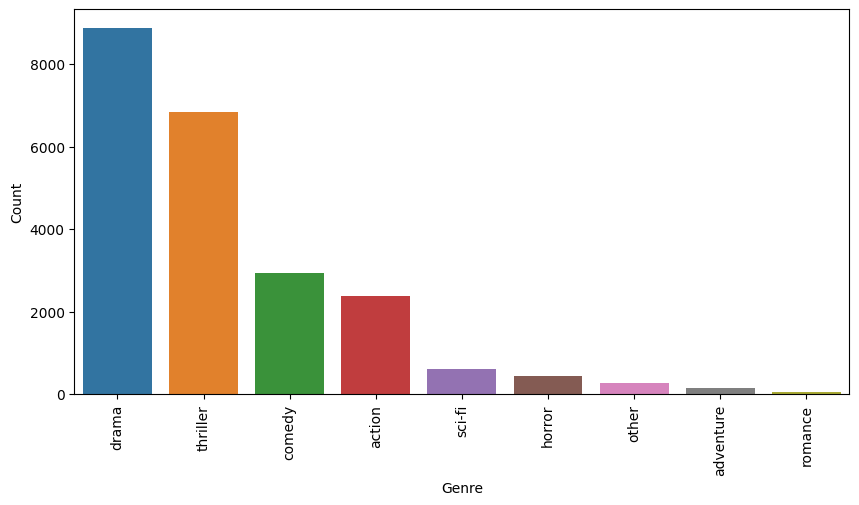

In [14]:
# Vizualize the data
plt.figure(figsize=(10,5))
counts = movies_data.genre.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90);

# **Data Cleaning**

In [15]:
# Lower-case text characters
movies_data.text = movies_data.text.apply(lambda x: x.lower())
movies_data.head()

,text,genre
0,"eady dead, maybe even wishing he was. int. 2nd...",thriller
1,"t, summa cum laude and all. and i'm about to l...",comedy
2,"up come, i have a surprise.... she takes him ...",drama
3,ded by the two detectives. int. jeff's apartme...,thriller
4,"nd dismounts, just as the other children reach...",drama


In [22]:
# Remove noisy text
def denoise_text(text):
    text = "".join([i for i in text if i not in string.punctuation])
    text = re.sub(r"[^a-zA-Z+']", ' ',text)
    return text

# Apply function on iew column
movies_data['text']= movies_data['text'].apply(denoise_text)
movies_data.head()

,text,genre
0,eady dead maybe even wishing he was int nd fl...,thriller
1,t summa cum laude and all and im about to laun...,comedy
2,up come i have a surprise she takes him by th...,drama
3,ded by the two detectives int jeffs apartment ...,thriller
4,nd dismounts just as the other children reach ...,drama


# **Encoding Data**

In [23]:
# Genre Data one-hot-encoding
genre = pd.get_dummies(movies_data.genre)
new_movies = pd.concat([movies_data, genre], axis=1)
new_movies = new_movies.drop(columns='genre')
new_movies

,text,action,adventure,comedy,drama,horror,other,romance,sci-fi,thriller
0,eady dead maybe even wishing he was int nd fl...,0,0,0,0,0,0,0,0,1
1,t summa cum laude and all and im about to laun...,0,0,1,0,0,0,0,0,0
2,up come i have a surprise she takes him by th...,0,0,0,1,0,0,0,0,0
3,ded by the two detectives int jeffs apartment ...,0,0,0,0,0,0,0,0,1
4,nd dismounts just as the other children reach ...,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
22574,n in the world to decide what im going to do a...,0,0,0,1,0,0,0,0,0
22575,shards bojo laz laz pushes deke back through t...,0,0,0,1,0,0,0,0,0
22576,ottie youve got a thing about ernies havent yo...,0,0,0,0,0,0,0,0,1
22577,with marked skill and dexterity lana wryly yo...,1,0,0,0,0,0,0,0,0


In [24]:
# Data labelling
text = new_movies['text'].values
genre = new_movies[['action', 'adventure', 'comedy', 'drama', 'horror', 'other', 'romance', 'sci-fi', 'thriller']].values

In [25]:
text

array(['eady dead maybe even wishing he was int  nd floor hallway three night the orderly leads liza to a door orderly in here white guy in his   s he opens the door and they step into room three theres a white guy in his mid   s he looks up wild straight jacketed not jerry lizas reached the end of her rope she just shakes her head int decrepit hospital room night balled up fetal not really all there head pressed to the cement he tries to sing to himself jerry blue moon blue moon int  nd floor hallway three night liza just stands there leaning on a rail on the wall the orderly isnt sure whats going on but he knows its bad orderly you okay liza starts down the hall with the orderly following orderly we got some new patients last week you want to see them liza waves them off its hopeless she stops at a chicken wired window at the end of the hall looks out lights about to break and jerrys out there somewhere orderly look i gotta get back to work',
       't summa cum laude and all and im 

In [26]:
genre

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

# **Split Dataset into 20% for Validation**

In [27]:
text_train, text_test, genre_train, genre_test = train_test_split(text, genre, test_size=0.2, random_state=42)

In [28]:
print(len(text_test))
print(len(genre_test))

4516
4516


# **Tokenization**

In [71]:
words = 20000
oov_tok = "<oov>"
max_len = 200
truncation ='post'

tokenizer = Tokenizer(num_words = words, oov_token = oov_tok)
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)


seq_train = tokenizer.texts_to_sequences(text_train)
seq_test = tokenizer.texts_to_sequences(text_test)

pad_train = pad_sequences(seq_train, maxlen = max_len, truncating = truncation)
pad_test = pad_sequences(seq_test, maxlen = max_len, truncating = truncation)

# **Build the Model**

In [75]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim = words, output_dim = 64, input_length = max_len),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(9, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           1280000   
                                                                 
 dropout (Dropout)           (None, 200, 64)           0         
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 9)                 585       
                                                                 
Total params: 1313609 (5.01 MB)
Trainable params: 1313609 (5.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Create Callback**

In [76]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.91 and logs.get('val_accuracy') > 0.91):
      print("\n The accuracy is reached 90%!")
      self.model.stop_training = True
callbacks = myCallback()

# **Running the Model**

In [77]:
history = model.fit(
    pad_train,
    genre_train,
    epochs = 50,
    callbacks = [callbacks],
    verbose = 1,
    validation_data=(pad_test, genre_test)
)

Epoch 1/50
565/565 [==============================] - 162s 284ms/step - loss: 0.2809 - accuracy: 0.3685 - val_loss: 0.2625 - val_accuracy: 0.3826
Epoch 2/50
565/565 [==============================] - 76s 134ms/step - loss: 0.2637 - accuracy: 0.3946 - val_loss: 0.2516 - val_accuracy: 0.4763
Epoch 3/50
565/565 [==============================] - 78s 139ms/step - loss: 0.2270 - accuracy: 0.5563 - val_loss: 0.1816 - val_accuracy: 0.6457
Epoch 4/50
565/565 [==============================] - 78s 139ms/step - loss: 0.1357 - accuracy: 0.7749 - val_loss: 0.1279 - val_accuracy: 0.7817
Epoch 5/50
565/565 [==============================] - 78s 138ms/step - loss: 0.0778 - accuracy: 0.8824 - val_loss: 0.0870 - val_accuracy: 0.8543
Epoch 6/50
565/565 [==============================] - 78s 137ms/step - loss: 0.0521 - accuracy: 0.9174 - val_loss: 0.0826 - val_accuracy: 0.8702
Epoch 7/50
565/565 [==============================] - 79s 139ms/step - loss: 0.0385 - accuracy: 0.9400 - val_loss: 0.0833 - val_a

# **Vizualize Accuracy and Loss Model**

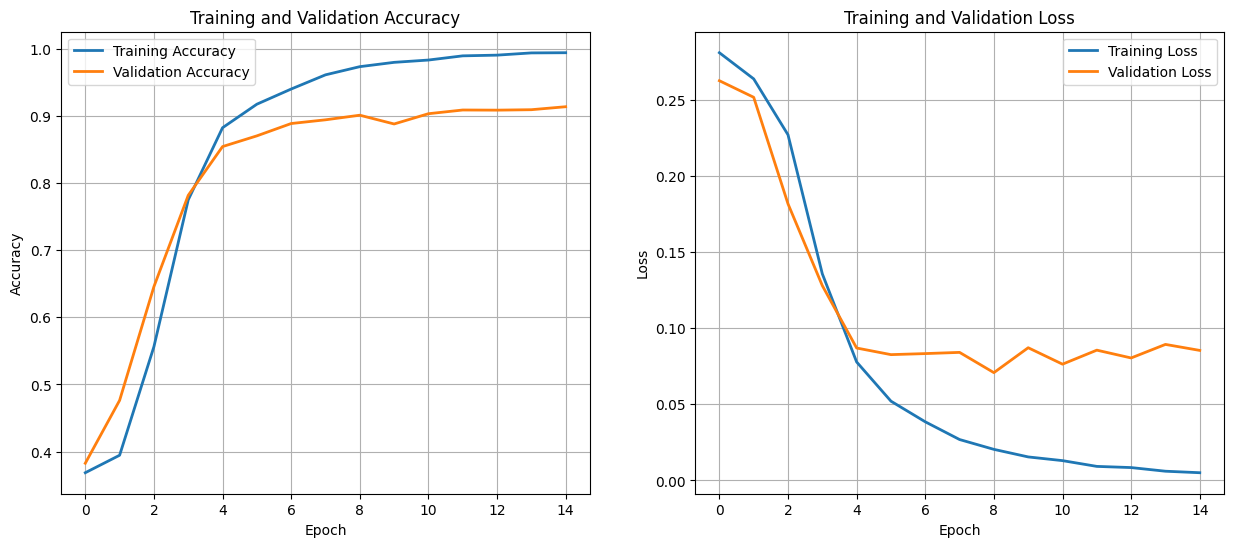

In [78]:
# Plotting Accuracy and Loss in Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plotting Accuracy
ax1.set_title('Training and Validation Accuracy')
ax1.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plotting Loss
ax2.set_title('Training and Validation Loss')
ax2.plot(history.history['loss'], label='Training Loss', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.show()